# Ejercicio aplicado_Predicción de series temporales con modelos avanzados de LSTM

A continuación vamos a entrenar un modelo de LSTM para predecir el número de pasajeros de avión. Código basado en https://github.com/gianfelton/ 

# Parte I

### Importación de librerías y datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('datos\AirPassengers.csv')

In [77]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [2]:
## Descompón la serie de datos

In [1]:
## Muestra solo la parte de estacionalidad ¿dirías que es estacional la serie de datos?

### Pre-procesamiento de datos

In [80]:
train, test = df[:-48], df[-48:]

In [81]:
train_original = train.copy()
test_original = test.copy()

In [82]:
## Normaliza el conjunto de datos

In [83]:
## Transforma los datos para predecir series temporales con la funcion TimeseriesGenerator

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

## Entrena una red LSTM con varias capas, incluido alguna de Dropout

## Programa la función que permita guardar el modelo

lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 12, 100)           40800     
_________________________________________________________________
lstm_13 (LSTM)               (None, 12, 100)           80400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 100)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 300)               481200    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 301       
Total params: 602,701
Trainable params: 602,701
Non-trainable params: 0
_________________________________________________________________


In [85]:
## Compila el modelo

### EarlyStopping y Validation Generator

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

## Programa el earlystopping

In [87]:
validation_generator = TimeseriesGenerator(test_scaled,test_scaled, 
                                           length=n_input)

In [3]:
## Entrena el modelo, con el earlystopping y el guardado

In [4]:
## Valida que el modelo no tenga overfitting

# Parte II

### Predicción de 48 meses

In [90]:
## Realiza una predicción de los ultimos 48 meses

#### Invertir la transformación

In [100]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

In [101]:
df_test = pd.concat([test,df_predict], axis=1)

No handles with labels found to put in legend.


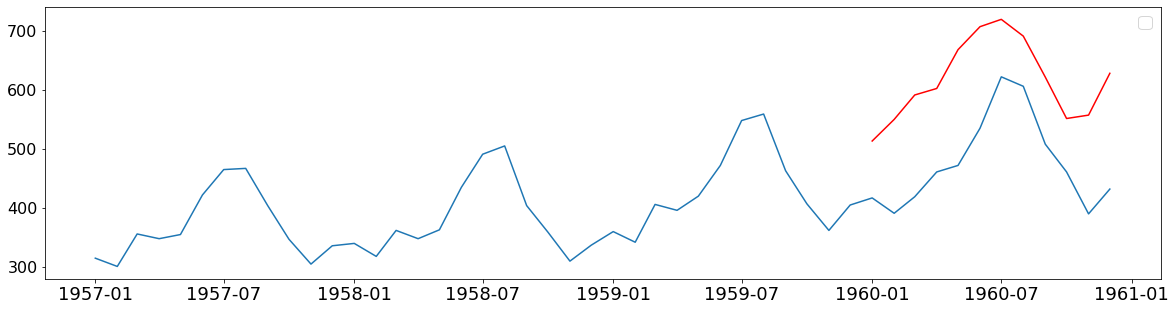

In [102]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AirPassengers'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [5]:
## Obtén las métricas de MSE, RMSE,media

### Reentrenar y predecir nuevos datos

In [104]:
## Reentrena el modelo con todos los datos para realizar una prediccion con los futuros 12 meses

In [6]:
## Realiza una prediccion de los proximos 12 meses y guarda los datos en pred_list

In [110]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [111]:
## Obtén los valores reales de la predicción (pred_list)

df_proj = pd.concat([df,df_predict], axis=1)

In [7]:
## Representa el historico de datos mas la prediccion